In [6]:
import sklearn
sklearn.__version__

'1.2.2'

# kNN

In [7]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [8]:
iris = load_iris(as_frame=True)
df = iris.frame
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
def setcolor(s):
    color = []
    colors = [ 'b','g','r' ]
    for i in s.values:
        color.append( colors[i] )
    return color

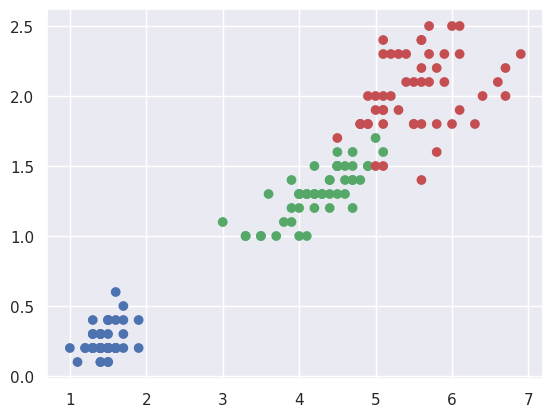

In [10]:
plt.scatter(x=df['petal length (cm)'], 
            y=df['petal width (cm)'], 
            color = setcolor(df['target']) )
 

### 자료 정규화

In [58]:
# 자료 분리 및 성능평가 함수  
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [59]:
def dispConfusionMatrix(y_true, y_pred):
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, linewidth=0.5 )
    plt.xlabel('Predicted')
    plt.ylabel('Ground truth')
    plt.show()

In [ ]:
print(classification_report(y_test, pred))

NameError: ignored

In [ ]:
y_test != pred

NameError: ignored

In [ ]:
y_test[ytest!=pred]

NameError: ignored

In [ ]:
(y_test[y_test != pred]).index

NameError: ignored

In [ ]:
edf = df.iloc[(y_test[y_test!=pred]).index, :]

NameError: ignored

NameError: ignored

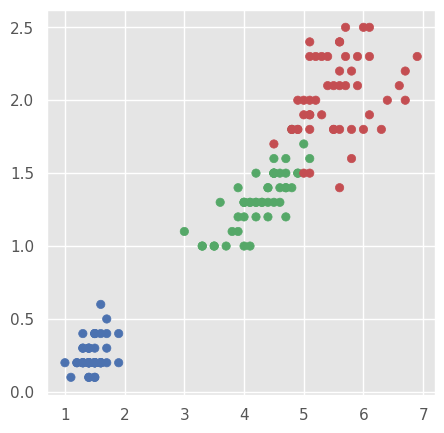

In [ ]:
# 데이터 & 예측결과 표시하기
plt.figure(figsize=(5,5))

plt.scatter(x=df['petal length (cm)'], 
            y=df['petal width (cm)'], 
            color =  setcolor(df['target']), 
            alpha=1 ) #불투명

plt.scatter(x=edf['petal length (cm)'],
            y=edf['petal width (cm)'],
            color = 'k',
            alpha = 0.4)

plt.show()

# SVM

In [11]:
x = np.array([ [0,0], 
               [1,1] ])
y = [0,1]

In [12]:
from sklearn.svm import LinearSVC
model = LinearSVC()
model.fit(x, y)

LinearSVC()

In [13]:
test_data = np.array([[0.7, 0.6],
                        [0.3,0.2]])
pred = model.predict(test_data)
pred

array([1, 0])

In [14]:
print(model.coef_ )
print(model.intercept_ )

[[0.58823254 0.58823254]]
[-0.47058136]


In [15]:
c =  model.coef_[0]
i =  model.intercept_[0]
w =  -c[0] / c[1]
b =  -i / c[1]
print('기울기:', w, '\ny절편:', b)

기울기: -1.0 
y절편: 0.7999920468295529


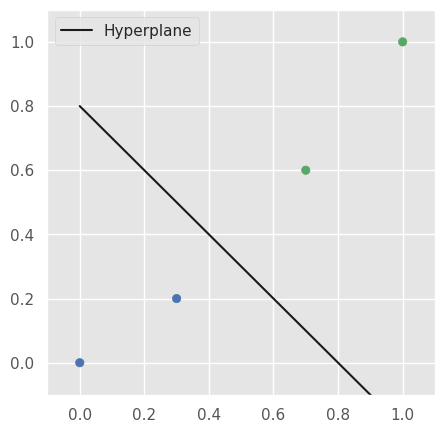

In [16]:
xx = np.linspace(0, 1.5, 50)
yy =  w * xx + b

plt.figure(figsize=(5,5))
plt.style.use("ggplot")
plt.plot(xx, yy, 'k-', label='Hyperplane')
plt.scatter( x[:,0] , x[:,1] ,
           color=setcolor(pd.Series(y))) 
plt.scatter( test_data[:,0] , test_data[:,1] ,
           color=setcolor(pd.Series(pred))) 
plt.legend()
plt.axis([-0.1, 1.1, -0.1, 1.1]) #[xmin, xmax, ymin, ymax]
plt.show()

## XOR

In [ ]:
x = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])
y = 

In [ ]:
test_data = np.array([[0.8, 0.8], 
                      [0.2, 0.9],
                      [0.1, 0.3], 
                      [0.5, 0.7],
                      [0.7, 0.5], 
                      [0.5, 0.4],
                      [0.3, 0.3], 
                      [0.7, 0.7]])
pred= 

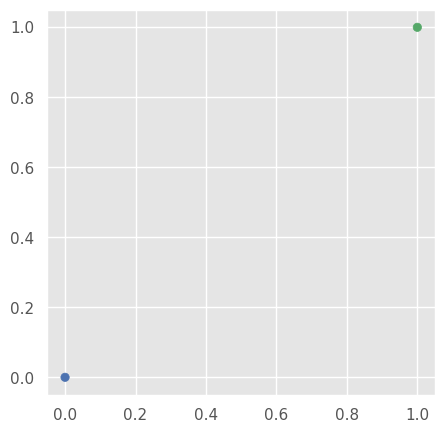

In [21]:
'''
plt.figure(figsize=(5,5))
plt.style.use("ggplot")
plt.plot(xx, yy, 'k-', label='Hyperplane')
plt.scatter( x[:,0] , x[:,1] ,
           color=setcolor(pd.Series(y))) 
plt.scatter( test_data[:,0] , test_data[:,1] ,
           color=setcolor(pd.Series(pred))) 
plt.legend()
plt.axis([-0.1, 1.1, -0.1, 1.1]) #[xmin, xmax, ymin, ymax]
plt.show()
'''

plt.figure(figsize=(5,5))
plt.style.use("ggplot")
plt.scatter( x[:,0], x[:,1], 
            color=setcolor(pd.Series(y)))
#plt.scatter(test_data[:,0])

확률
조건부 확률과 베이지안 룰
 - 사건 A와 B가 동시에 일어날 확률

-베이지안룰
  - 조건부 확률로 부터 유도됨
```
P(A|B) =  P(B|A) * P(A) / P(B) = P(B|A) * P(A) / 시그마 m i=1 P(Bi)
```
`M개의 원인에 의해 해당 결과가 나오도록 원인마다 기여하는 확률들의 합`

  - P(A) : 이미 일어난 사건의 확률(= 사전 확률 prior probability)
  - P(B|A): 이미 일어난 상황 A에서 B가 일어난 확률(=가능도, liklihood)
  - P(B): 모든 가설에 대한 증거가 발생할 확률(=에비던스 모델, evidence model)
  - P(A|B): B에 의해 A가 일어날 확률(=사후 확률, posterior probability)
    -  여러개의 가설이 만들어짐

- 나이브 베이지안 분류기
 - 조건부 확률 기반 방법
 - (예) 날씨에 따라 필드에 나올지 아닌 지를 결정하려고 하는 문제
 오늘 날씨: 비가 오고, 온도가 적당하고, 습도가 높고, 바람이 분다.
 '어리숙한': 모든사건을 독립적이라고 가정

 문제1 오늘날씨: 맑고, 온도가 적당하고, 습도가 높고, 바람이 분다.
 골프 치러 나올까?
 [풀이]
 [1] 가설
  - 가설 H1 : yes
  - 가설 H2 : no
 [2] 사전확률 (맑고)
  - 가설 H1 : P(yes) = 9/14
  - 가설 H2 : P(no) 5/14
 [3] 가능도
  - 가설 H1: P(Sunny, Mild, High, 



  scikit learn 에서 나이브 베이지안 분류 기준
   - MAP (Maximum A Posteriori)
    - 사후 확률을 계산하여 더 높은 확률을 가지는 것을 정답으로 분류
   - [문제1] 오늘 날씨: 맑고, 온도가 적당하고, 습도가 높고, 바람이 분다 골프치러 나올까? NO
   P(Sunny, Mild,High, True|Yes)P(Yes)

 scikit learn 에서 제공하는 나이브 베이지안 종류 ( 자료의 특성에 따른 분류기 제공)
 - 가우시안 나이브 베이즈GaussianNB()
   - 연속적인 값에 사용
 - 다항분포 나이브 베이즈 MultinomialNB()
   - 이산적인 값에 사용
   - 하나의 특성이 여러 종류로 나뉘어지는 경우   

# Naive Bayes

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
!pwd

/content


In [33]:
data = pd.read_csv('/content/drive/MyDrive/ICTIS_2023/data/weather_play.csv')
data

,outlook,temperature,humidity,windy,play
0,rainy,hot,high,False,no
1,rainy,hot,high,True,no
2,overcast,hot,high,False,yes
3,sunny,mild,high,False,yes
4,sunny,cool,normal,False,yes
5,sunny,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,rainy,mild,high,False,no
8,rainy,cool,normal,False,yes
9,sunny,mild,normal,False,yes


In [34]:
# mapping dictionary 만들기
outlook_dic =  {'overcast':0, 'rainy':1, 'sunny':2}
temperature_dic =  {'cool':0, 'hot':1, 'mild':2}
humidity_dic =  {'high':0, 'normal':1}
windy_dic =  {False:0, True:1}


# 딕셔너리를 활용해 데이터 매핑
data['outlook'] = data['outlook'].map(outlook_dic)
data['temperature'] = data['temperature'].map(temperature_dic)
data['humidity'] =  data['humidity'].map(humidity_dic)
data['windy'] = data['windy'].map(windy_dic)

In [35]:
data

,outlook,temperature,humidity,windy,play
0,1,1,0,0,no
1,1,1,0,1,no
2,0,1,0,0,yes
3,2,2,0,0,yes
4,2,0,1,0,yes
5,2,0,1,1,no
6,0,0,1,1,yes
7,1,2,0,0,no
8,1,0,1,0,yes
9,2,2,1,0,yes


In [36]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit( data.iloc[:, :4].to_numpy(), data['play'].to_numpy())

MultinomialNB()

In [ ]:
from sklearn.naive_bayes import 

In [40]:
# 날씨1  에 대한 예측 #맑고 온도가 적당하고, 습도가 높고, 바람이분다
model.predict([ [2,2,0,1] ])

array(['no'], dtype='<U3')

In [44]:
print(model.classes_)
#계산된확률
model.predict_proba( [[2,2,0,1]])



['no' 'yes']


array([[0.55477945, 0.44522055]])

In [46]:
# 날씨2 에 대한 예측 #비가 오고 온도가 적당하고, 습도가 높고, 바람이분다
model.predict([ [1,2,0,1] ])

array(['yes'], dtype='<U3')

In [47]:
#계산된확률
model.predict_proba( [[1,2,0,1]])

array([[0.48708265, 0.51291735]])

## 연속적인 데이터에 대한 나이브 베이지안 분류기

In [48]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame=True)
df = iris.frame
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,:4], df['target'], test_size=0.33)

In [54]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)

GaussianNB()

In [64]:
pred=model.predict(x_test)

array([1, 2, 2, 2, 0, 1, 2, 2, 0, 0, 0, 1, 2, 1, 0, 1, 0, 1, 1, 1, 2, 0,
       1, 2, 2, 1, 0, 2, 0, 1, 1, 0, 1, 1, 1, 2, 0, 1, 2, 0, 0, 2, 1, 1,
       1, 1, 0, 1, 1, 2])

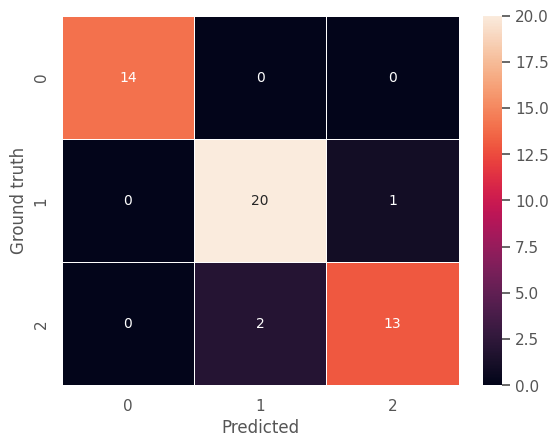

In [62]:
dispConfusionMatrix(y_test, pred)

In [68]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.91      0.95      0.93        21
           2       0.93      0.87      0.90        15

    accuracy                           0.94        50
   macro avg       0.95      0.94      0.94        50
weighted avg       0.94      0.94      0.94        50



# [4] 결정트리
# Decision Tree


## 순도를 계산하는 방법
1) Entropy에 의한 방법
 - 엔트로피 = 무질서도 = 정보력 낮음
 ```
   - 정보이론: 잘 일어나지 않는 사건의 정보는 자주 발생할 만한 사건보다 정보량이 많다.
     정보량 = - log2pi
     (밑수 2를 Shanon혹은 비트(bit)라고함)
```
2) Gini index(불순도)에 의한 방법
3) MSE (Mean Squared Error)에 의한 방법
 -  Regression 모델로 사용되는 경우

 결정 트리를 만드는 방법
 1) Entropy에 의한 방법 (Shannon entropy)
  - m 가지의 상태를 가지는 이산 변수로 구성된 A영역에 대한 엔트로피
  Entroy(A) = 

In [69]:
from sklearn.tree import DecisionTreeClassifier

In [72]:
model= DecisionTreeClassifier()
model.fit(data.iloc[:, :4].to_numpy(), data['play'].to_numpy())

DecisionTreeClassifier()

In [73]:
model.predict([[2,2,0,1]])

array(['no'], dtype=object)

In [77]:
model.predict_proba([[2,2,0,1]])

array([[1., 0.]])

In [74]:
model.predict([[1,2,0,1]])

array(['no'], dtype=object)

In [76]:
#계산된 확률
model.predict_proba([[1,2,0,1]])

array([[1., 0.]])

# Random Forest 분류기

In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()

In [ ]:
import matplotlib.pyplot as plt   # 그리기 화면 속성 reset

#그림 설정
fig = plt.figure( figsize=(6,6)) # 그림 크기의 단위는 인치
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, 
                    hspace=0.05, wspace=0.05)

# 숫자 출력
for i in range(64):
    ax = fig.add_subplot( 8, 8, i+1, xticks=[], yticks=[])
    ax.imshow(  , cmap=plt.cm.binary, 
              interpolation='nearest')
    # 이미지에 레이블 추가
    ax.text(0,7,    )

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# 앙상블 학습 분류기

In [ ]:
from sklearn.datasets import load_digits

digits = load_digits()

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(

In [ ]:
# preprocessing
from sklearn.preprocessing import StandardScaler


print(x_train_scaled.min(), x_train_scaled.max(), 
      x_test_scaled.min(), x_test_scaled.max())

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
log_clf =
knn_clf =
nb_clf =

voting_clf =  

rndf_clf = 
svm_clf =  

In [ ]:
# 정확도 확인
from sklearn.metrics import accuracy_score

clfList= [log_clf, knn_clf, nb_clf, voting_clf,
          rndf_clf, svm_clf ]

for clf in  :
    clf.fit( )
    pred =  
    print(f"{clf.__class__.__name__:23s}: {accuracy_score(y_test, pred):.3f}")